In [1]:
%run "Functions.ipynb"

In [2]:
all_seqs = pd.read_csv('CDR3B_sequences.csv',sep=',',on_bad_lines='skip',header =0)

In [3]:
all_seqs

CDR3  Chain Length     Epitope
0      CASSQDLSRLASYEQYF            17  Background
1          CASSEIGIQPQHF            13  Background
2         CSVEDHGSYNEQFF            14  Background
3         CATSSLAGVETQYF            14  Background
4       CASSQGQGARENIQYF            16  Background
...                  ...           ...         ...
43708      CATQDMNTGELFF            13   YLQPRTFLL
43709   CASLLKLRDTSYEQYF            16   YLQPRTFLL
43710     CSVMDSLNTGELFF            14   YLQPRTFLL
43711      CASQQGNTGELFF            13   YLQPRTFLL
43712     CASNPDRNTGELFF            14   YLQPRTFLL

[43713 rows x 3 columns]

In [4]:
all_seqs['Epitope'].value_counts()

Background    17184
KLGGALQAK     12615
NLVPMVATV      4622
GILGFVFTL      3469
AVFDRKSDAK     1641
ELAGIGILTV     1410
GLCTLVAML      1030
YLQPRTFLL       897
RAKFKQLL        845
Name: Epitope, dtype: int64

In [5]:
BG,KLG,NLV,GIL,AVF,ELA,GLC,YLQ,RAK = (all_seqs.loc[(all_seqs['Epitope'] == 'Background')],
                          all_seqs.loc[(all_seqs['Epitope'] == 'KLGGALQAK')],
                          all_seqs.loc[(all_seqs['Epitope'] == 'NLVPMVATV')],
                          all_seqs.loc[(all_seqs['Epitope'] == 'GILGFVFTL')],
                          all_seqs.loc[(all_seqs['Epitope'] == 'AVFDRKSDAK')],
                          all_seqs.loc[(all_seqs['Epitope'] == 'ELAGIGILTV')],
                          all_seqs.loc[(all_seqs['Epitope'] == 'GLCTLVAML')],
                          all_seqs.loc[(all_seqs['Epitope'] == 'YLQPRTFLL')],
                          all_seqs.loc[(all_seqs['Epitope'] == 'RAKFKQLL')]
                         )

### Preprocessing

CDR3$\beta$ sequences specific to the YLQPRTFLL (YLQ) and GILGFVFTL (GIL) epitopes were analysed. The GIL sequences were sampled to the same size as the YLQ sequences. ~15% of the sequences from each epitope were reserved for testing. This leads to: 

- 897 $\times$ 2 = 1794 sequences to start with
- 1524 total training sequences
- 270 total testing sequences


In [6]:
GIL_samp = GIL.sample(len(YLQ), random_state=1)
print(f"Starting sizes: GIL(sampled): {len(GIL_samp)} seqs, YLQ: {len(YLQ)} seqs.")

YLQ_GIL = pd.concat([GIL_samp,YLQ])

Starting sizes: GIL(sampled): 897 seqs, YLQ: 897 seqs.


In [7]:
GIL_samp

CDR3  Chain Length    Epitope
32153   CSVEKGTATLEQYF            14  GILGFVFTL
30029    CASSIRSFYEQYF            13  GILGFVFTL
31158      CSVGSIYGYTF            11  GILGFVFTL
31214    CASGIRSVAEAFF            13  GILGFVFTL
30888    CASSSRSQHEQYF            13  GILGFVFTL
...                ...           ...        ...
30398  CASSPIGGGGNEQFF            15  GILGFVFTL
32855   CASSLEVGLGGYTF            14  GILGFVFTL
30032  CASSQDITVLYGYTF            15  GILGFVFTL
31343  CASSITGAFGTEAFF            15  GILGFVFTL
31823   CASTPGIYNSPLHF            14  GILGFVFTL

[897 rows x 3 columns]

In [8]:
YLQ_train, YLQ_test = train_test_split(YLQ, test_size = 0.15, random_state = 1)
GIL_train, GIL_test= train_test_split(GIL_samp, test_size = 0.15, random_state = 1)

print(f"(per epitope) Number of training seqs: {len(GIL_train)}, testing seqs: {len(GIL_test)}, ({len(GIL_test)/(len(GIL_train)+len(GIL_test))*100:.1f} % for testing) ")
print(f"(Total) Number of training seqs: {len(GIL_train)+len(YLQ_train)}, testing seqs: {len(GIL_test)+len(YLQ_test)}, ({(len(GIL_test)+len(YLQ_test))/(len(GIL_train)+len(GIL_test)+len(YLQ_train)+len(YLQ_test))*100:.1f} % for testing) ")

(per epitope) Number of training seqs: 762, testing seqs: 135, (15.1 % for testing) 
(Total) Number of training seqs: 1524, testing seqs: 270, (15.1 % for testing) 


In [9]:
GIL_train

CDR3  Chain Length    Epitope
31354   CASSTHSGGNNEQFF            15  GILGFVFTL
32989  CASSSRQGAANEKLFF            16  GILGFVFTL
32925  CASSPLSGRVTDTQYF            16  GILGFVFTL
30942   CASSLEVTTNEKLFF            15  GILGFVFTL
30412   CSAPVVTGPTDTQYF            15  GILGFVFTL
...                 ...           ...        ...
32616    CASMELAGLNEQFF            14  GILGFVFTL
32448   CASSQEGGLDYGYTF            15  GILGFVFTL
30698      CASSIGYHGYTF            12  GILGFVFTL
31062     CASSPLSASEEFF            13  GILGFVFTL
32265     CASSPSGPWPQYF            13  GILGFVFTL

[762 rows x 3 columns]

In [10]:
GIL_test

CDR3  Chain Length    Epitope
30656      CASSPTGVGEQFF            13  GILGFVFTL
32272      CASSIFHTDTQYF            13  GILGFVFTL
30334     CASSLDSANYGYTF            14  GILGFVFTL
31732     CASNAGSTNYGYTF            14  GILGFVFTL
30426    CSVPPLGGIGETQYF            15  GILGFVFTL
...                  ...           ...        ...
31406      CASSQRSSDTQYF            13  GILGFVFTL
32640      CASSIFGQVDAFF            13  GILGFVFTL
32705      CASSPRSGNTIYF            13  GILGFVFTL
33197    CASSADGILNTEAFF            15  GILGFVFTL
31392  CASSLLAGGSGTDTQYF            17  GILGFVFTL

[135 rows x 3 columns]

In [11]:
YLQ_test

CDR3  Chain Length    Epitope
42900  CAIQDRGSLNTGELFF            16  YLQPRTFLL
43518     CAVQDSNTGELFF            13  YLQPRTFLL
42958  CSARDRVGQNTGELFF            16  YLQPRTFLL
43611     CATQNMNTGELFF            13  YLQPRTFLL
43561     CATQRANTGELFF            13  YLQPRTFLL
...                 ...           ...        ...
43492     CASSDLTGGEAFF            13  YLQPRTFLL
43242     CASAEMNTGELFF            13  YLQPRTFLL
43704     CAPGSANTGELFF            13  YLQPRTFLL
43535     CANGKANTGELFF            13  YLQPRTFLL
43599     CASNNANTGELFF            13  YLQPRTFLL

[135 rows x 3 columns]

In [12]:
YLQ_GIL_test = pd.concat([YLQ_test, GIL_test])
print(YLQ_GIL_test)

                    CDR3  Chain Length    Epitope
42900   CAIQDRGSLNTGELFF            16  YLQPRTFLL
43518      CAVQDSNTGELFF            13  YLQPRTFLL
42958   CSARDRVGQNTGELFF            16  YLQPRTFLL
43611      CATQNMNTGELFF            13  YLQPRTFLL
43561      CATQRANTGELFF            13  YLQPRTFLL
...                  ...           ...        ...
31406      CASSQRSSDTQYF            13  GILGFVFTL
32640      CASSIFGQVDAFF            13  GILGFVFTL
32705      CASSPRSGNTIYF            13  GILGFVFTL
33197    CASSADGILNTEAFF            15  GILGFVFTL
31392  CASSLLAGGSGTDTQYF            17  GILGFVFTL

[270 rows x 3 columns]


### Clustering

All the sequences were aligned (left/right padded) to the same length, set by `global_alg_length`. Each set of training sequences underwent hierarchical clustering using tools from the Pyrepseq [1] library. The (Levenshtein) distance threshold $t$ that determines the sequence similarity, set by `distance_thresholds`, was varied from 1 to 100. 

In [13]:
global_alg_length = 21

YLQ_GIL_test_alg = lr_align(YLQ_GIL_test,showmaxlength=False, set_maxlength = 25,global_maxlength = global_alg_length, include_local = False)
print(YLQ_GIL_test_alg)
YLQ_GIL_test_alg.to_csv('YLQ_GIL_test_alg.csv',index=False,sep=',')

         Epitope  Old length              Glob lalg              Glob ralg  \
42900  YLQPRTFLL          16  CAIQDRGSLNTGELFF-----  -----CAIQDRGSLNTGELFF   
43518  YLQPRTFLL          13  CAVQDSNTGELFF--------  --------CAVQDSNTGELFF   
42958  YLQPRTFLL          16  CSARDRVGQNTGELFF-----  -----CSARDRVGQNTGELFF   
43611  YLQPRTFLL          13  CATQNMNTGELFF--------  --------CATQNMNTGELFF   
43561  YLQPRTFLL          13  CATQRANTGELFF--------  --------CATQRANTGELFF   
...          ...         ...                    ...                    ...   
31406  GILGFVFTL          13  CASSQRSSDTQYF--------  --------CASSQRSSDTQYF   
32640  GILGFVFTL          13  CASSIFGQVDAFF--------  --------CASSIFGQVDAFF   
32705  GILGFVFTL          13  CASSPRSGNTIYF--------  --------CASSPRSGNTIYF   
33197  GILGFVFTL          15  CASSADGILNTEAFF------  ------CASSADGILNTEAFF   
31392  GILGFVFTL          17  CASSLLAGGSGTDTQYF----  ----CASSLLAGGSGTDTQYF   

       Glob alg length  
42900               21  
43518        

In [14]:
YLQ_train_alg = lr_align(YLQ_train,showmaxlength=False, set_maxlength = 25,global_maxlength = global_alg_length, include_local = False)
print(YLQ_train_alg)

GIL_train_alg = lr_align(GIL_train,showmaxlength=False, set_maxlength = 25,global_maxlength = global_alg_length, include_local = False)
print(GIL_train_alg)

         Epitope  Old length              Glob lalg              Glob ralg  \
43501  YLQPRTFLL          16  CASRGLAEQNTGELFF-----  -----CASRGLAEQNTGELFF   
43298  YLQPRTFLL          13  CASTDLNTGELFF--------  --------CASTDLNTGELFF   
43317  YLQPRTFLL          16  CASSPVGGGNTGELFF-----  -----CASSPVGGGNTGELFF   
43516  YLQPRTFLL          16  CASSPPGAGNTGELFF-----  -----CASSPPGAGNTGELFF   
42970  YLQPRTFLL          14  CAMRTDPNTGELFF-------  -------CAMRTDPNTGELFF   
...          ...         ...                    ...                    ...   
43531  YLQPRTFLL          15  CSVAGFLAVYNEQFF------  ------CSVAGFLAVYNEQFF   
43583  YLQPRTFLL          16  CSARDPWGINTGELFF-----  -----CSARDPWGINTGELFF   
42888  YLQPRTFLL          13  CATCRVNTGELFF--------  --------CATCRVNTGELFF   
43051  YLQPRTFLL          13  CASTETNTGELFF--------  --------CASTETNTGELFF   
42853  YLQPRTFLL          16  CSARDRGATNTGELFF-----  -----CSARDRGATNTGELFF   

       Glob alg length  
43501               21  
43298        

Epitope: YLQPRTFLL
Distance threshold:  1
533    1
640    1
173    1
599    1
86     1
201    1
204    1
249    1
343    1
730    1
dtype: int64
Epitope: GILGFVFTL
Distance threshold:  1
156    1
742    1
334    1
307    1
637    1
415    1
342    1
381    1
214    1
218    1
dtype: int64
Epitope: YLQPRTFLL
Distance threshold:  3
22     9
144    7
160    7
127    5
130    5
19     5
137    5
136    4
142    4
371    4
dtype: int64
Epitope: GILGFVFTL
Distance threshold:  3
470    5
523    5
241    4
392    4
428    4
148    4
395    4
390    3
411    3
522    3
dtype: int64
Epitope: YLQPRTFLL
Distance threshold:  5
70     31
8      22
71     18
232    17
73     17
79     16
78     15
72     15
86     13
253    11
dtype: int64
Epitope: GILGFVFTL
Distance threshold:  5
216    13
377    12
362    11
435    11
404    10
359     9
376     8
361     7
453     7
421     6
dtype: int64
Epitope: YLQPRTFLL
Distance threshold:  7
43     176
44      37
4       31
165     27
151     24
166     24
3 

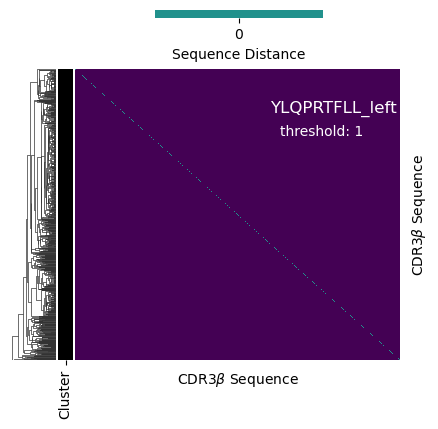

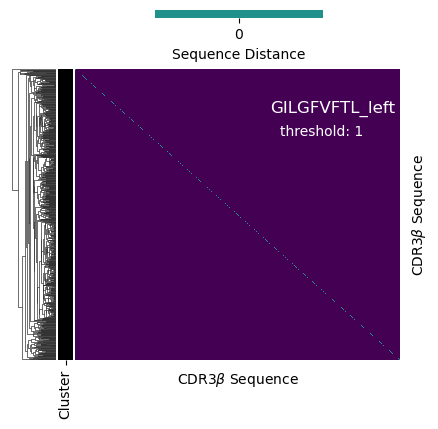

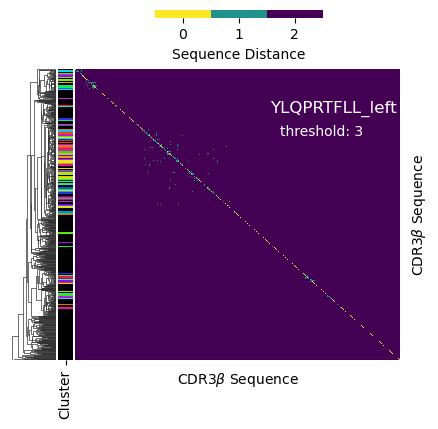

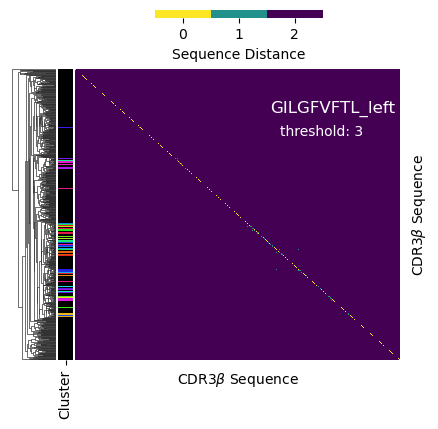

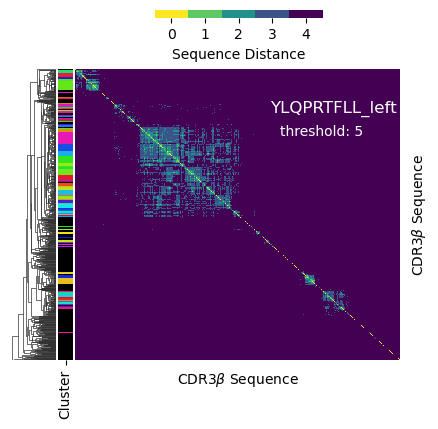

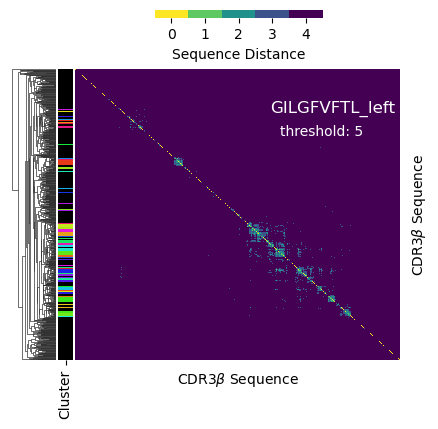

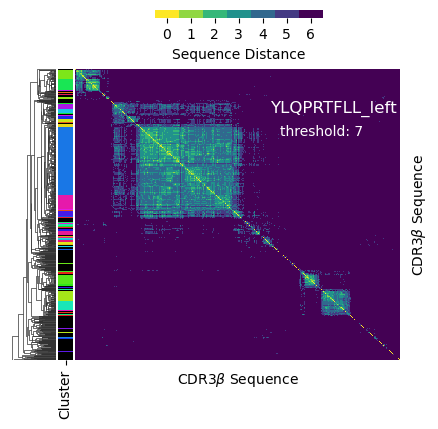

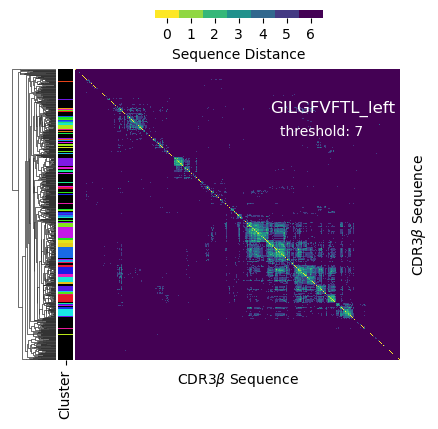

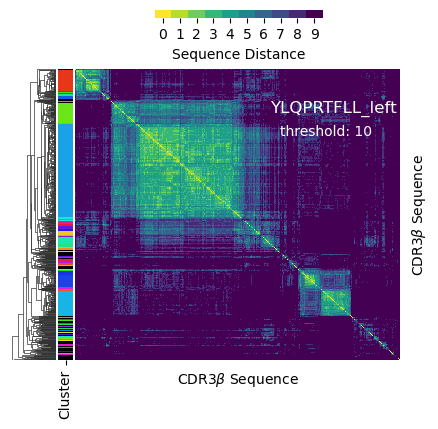

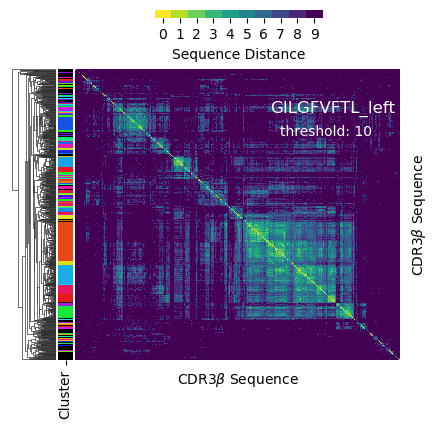

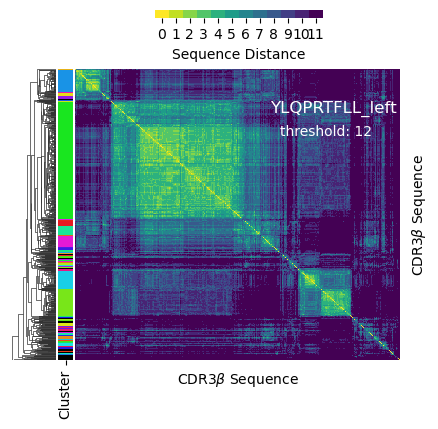

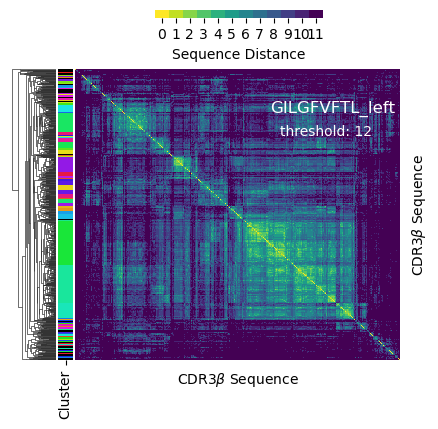

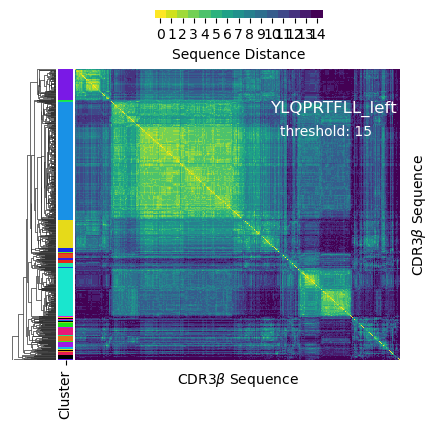

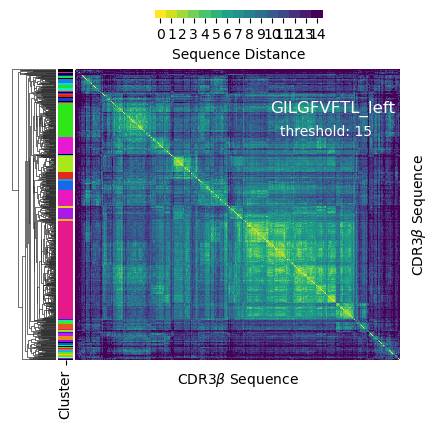

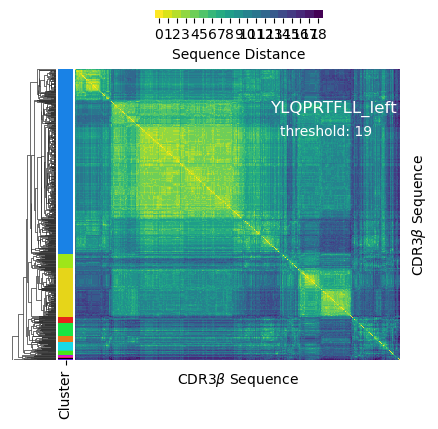

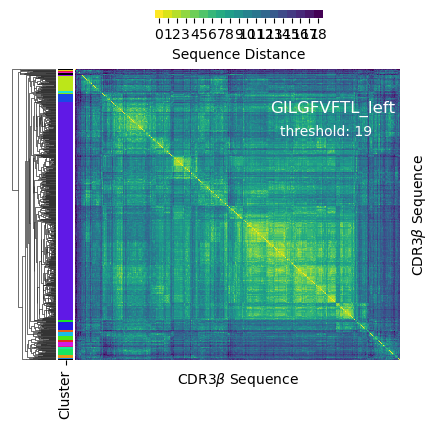

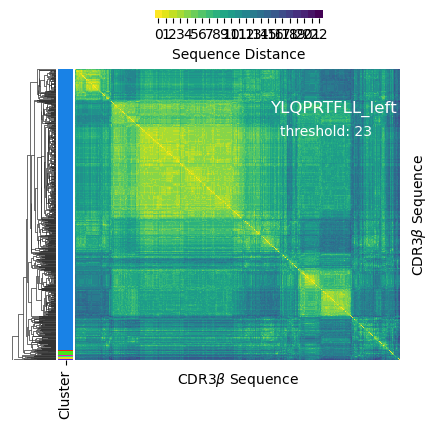

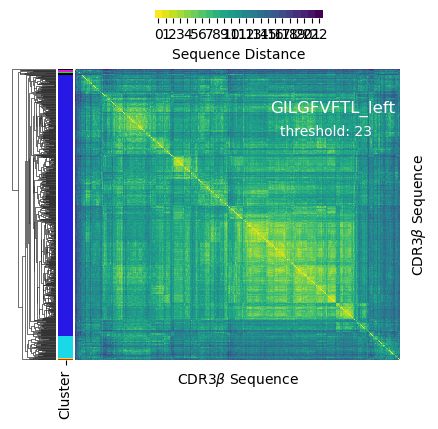

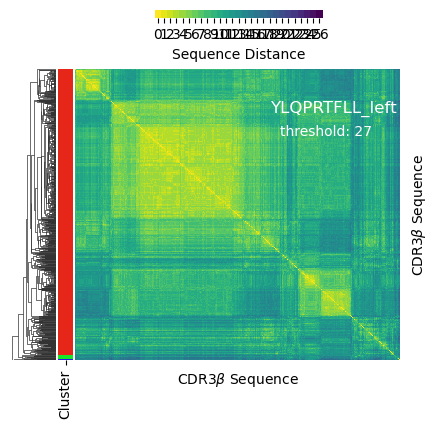

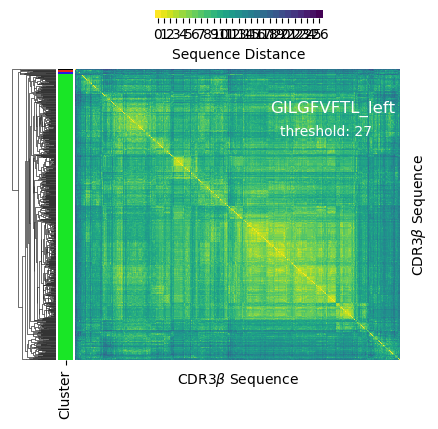

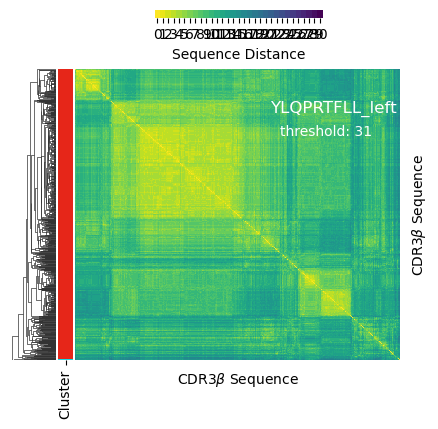

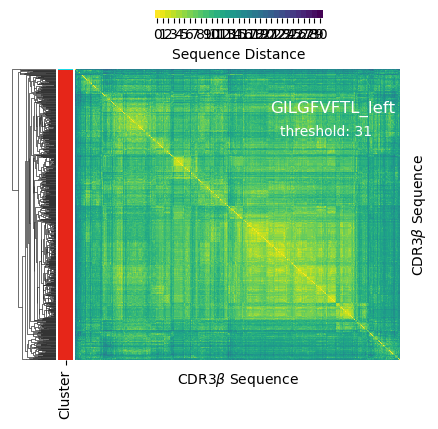

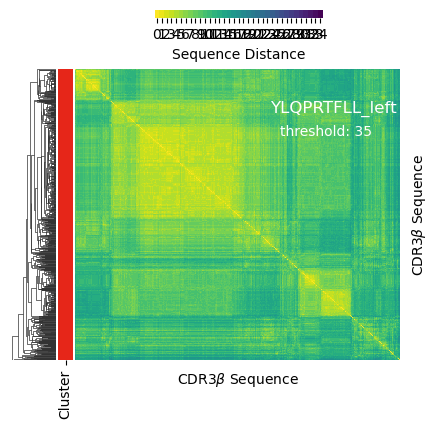

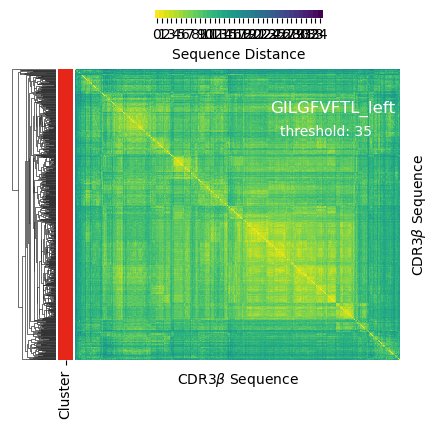

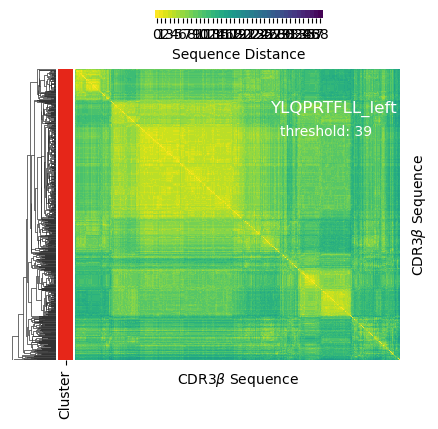

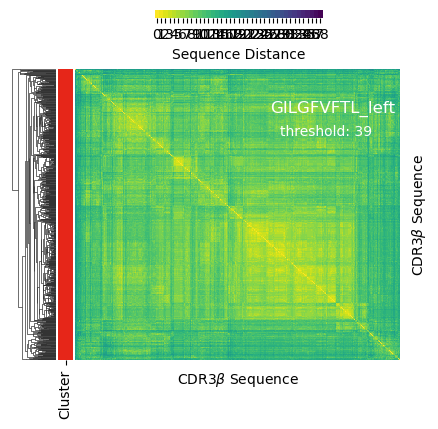

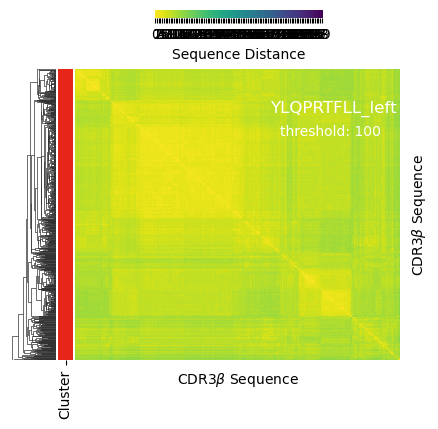

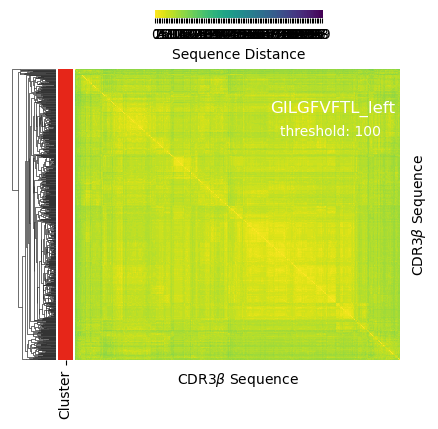

In [15]:
min_group_size = 0

distance_thresholds = [1,3,5,7,10,12,15,19,23,27,31,35,39,100]

epitopes = [YLQ_train_alg,GIL_train_alg]
ep_names = ["YLQPRTFLL","GILGFVFTL"]

lalg_Dict = {}

for n, max_dist in enumerate(distance_thresholds):

    lalg_Dict[f"Threshold {max_dist}"] = {}

    for i, ep in enumerate(epitopes):
        print("Epitope:", (ep_names[i]))
        ldist, lcg, llinkage, lcluster = similarity_clustermap(df= ep, dist_thres = max_dist,
                                                               epitope_name = (f'{ep_names[i]}_left'), 
                                                           alpha_column='Glob lalg',beta_column='Glob lalg',
                                                           )
        print(pd.Series(lcluster).value_counts().head(10)) # show 10 largest clusters
        
        lcluster_number, lcount = np.unique(lcluster, return_counts=True) # cluster_number = cluster id, count = cluster size
        
        lalg_Dict[f"Threshold {max_dist}"][f"{ep_names[i]}"] = {} # padded clusters
        
        for j, cl in enumerate(lcluster_number[lcount>min_group_size]):
            tcrs = ep[lcluster==cl]
            lalg_Dict[f"Threshold {max_dist}"][f"{ep_names[i]}"][f"Group {j}"] = {}
            lalg_Dict[f"Threshold {max_dist}"][f"{ep_names[i]}"][f"Group {j}"] = tcrs


Epitope: YLQPRTFLL
Distance threshold:  1
555    1
662    1
437    1
621    1
526    1
409    1
404    1
361    1
271    1
752    1
dtype: int64
Epitope: GILGFVFTL
Distance threshold:  1
250    1
71     1
641    1
666    1
594    1
372    1
632    1
354    1
308    1
312    1
dtype: int64
Epitope: YLQPRTFLL
Distance threshold:  3
49     9
268    7
254    7
285    5
283    5
52     5
274    5
275    4
271    4
393    4
dtype: int64
Epitope: GILGFVFTL
Distance threshold:  3
440    5
493    5
637    4
362    4
398    4
242    4
365    4
360    3
381    3
492    3
dtype: int64
Epitope: YLQPRTFLL
Distance threshold:  5
186    31
44     22
185    18
254    17
183    17
178    16
179    15
184    15
171    13
275    11
dtype: int64
Epitope: GILGFVFTL
Distance threshold:  5
532    13
357    12
342    11
415    11
384    10
339     9
356     8
341     7
433     7
401     6
dtype: int64
Epitope: YLQPRTFLL
Distance threshold:  7
129    176
128     37
39      31
186     27
172     24
187     24
40

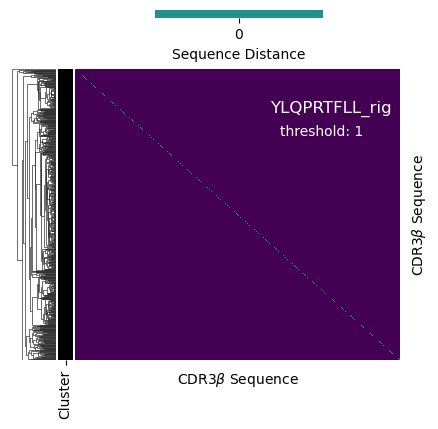

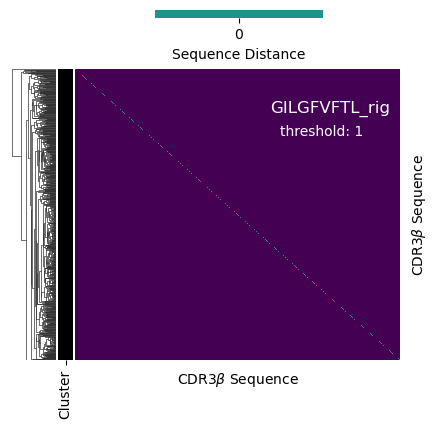

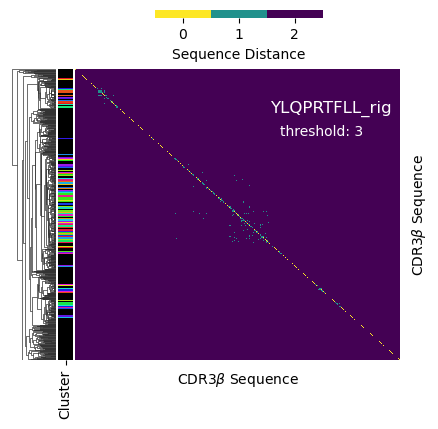

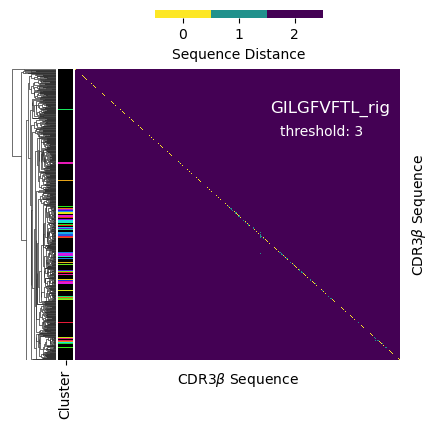

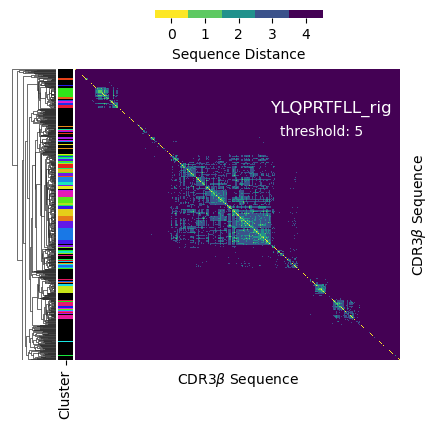

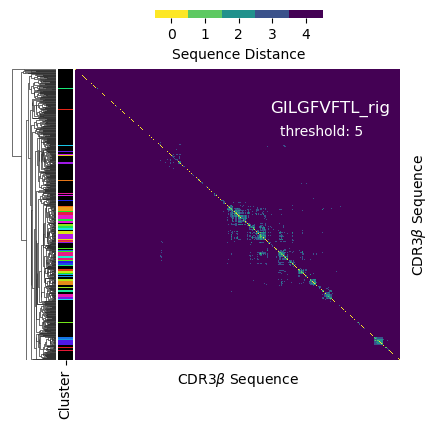

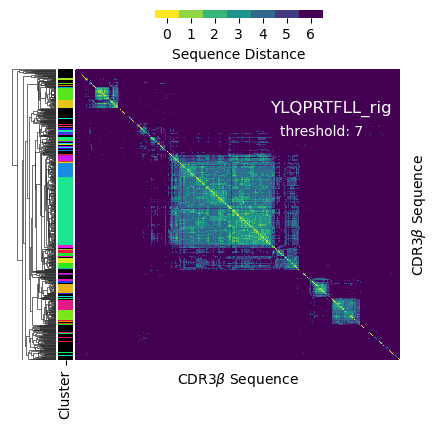

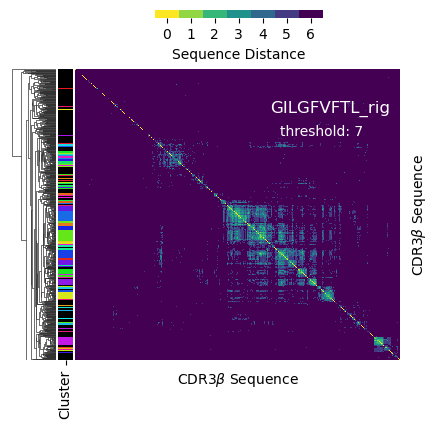

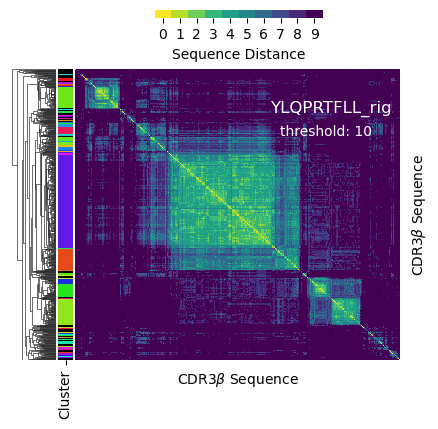

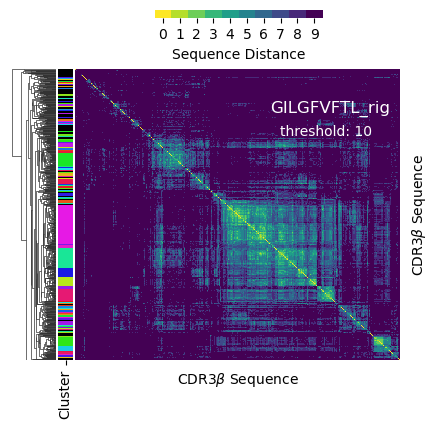

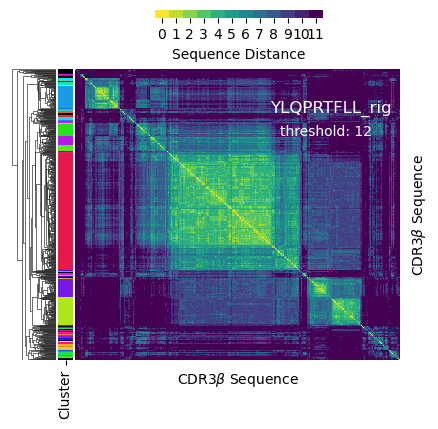

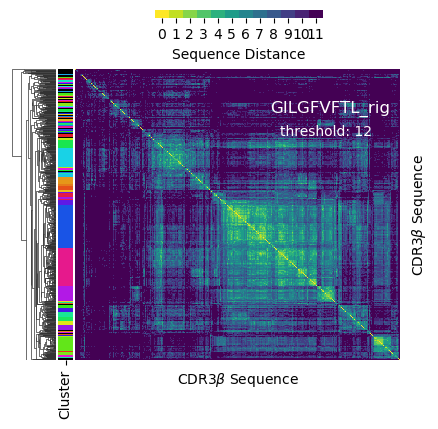

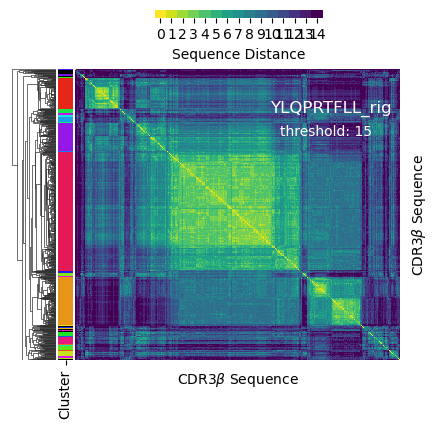

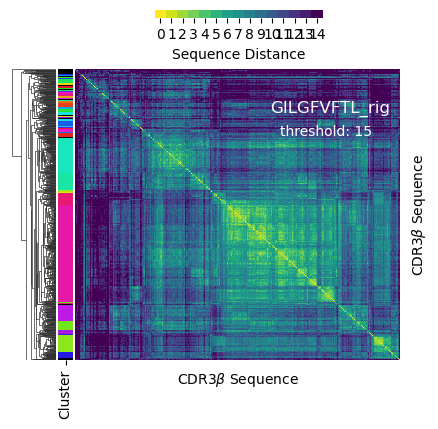

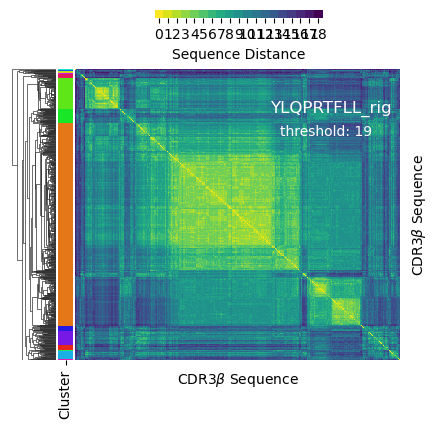

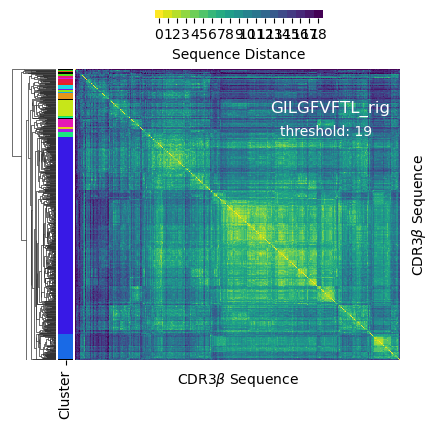

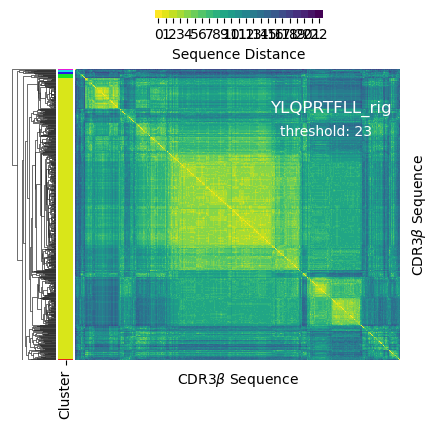

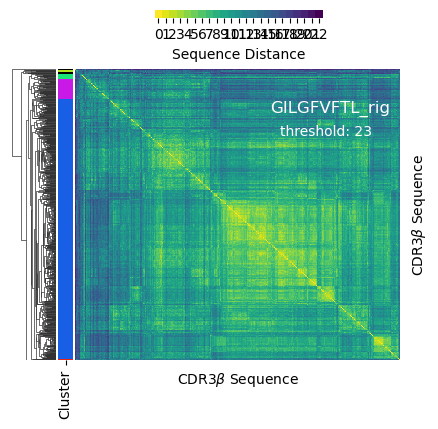

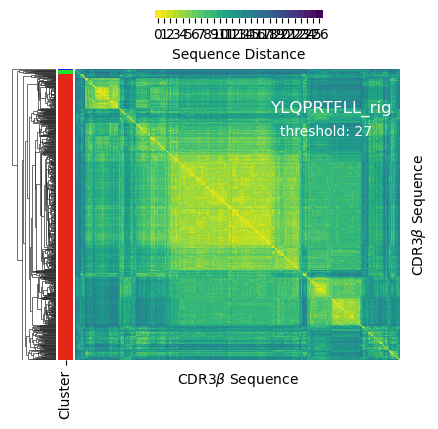

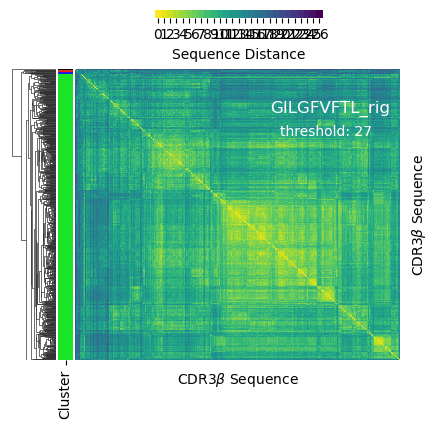

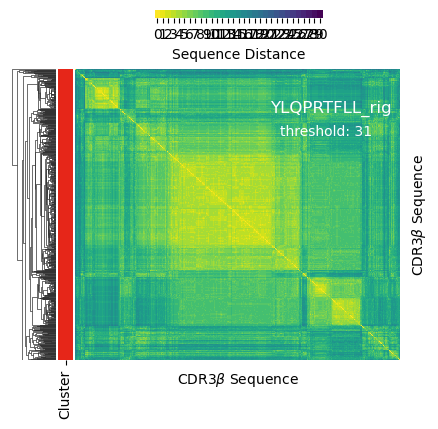

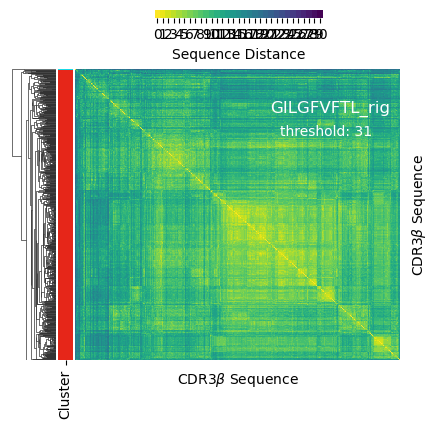

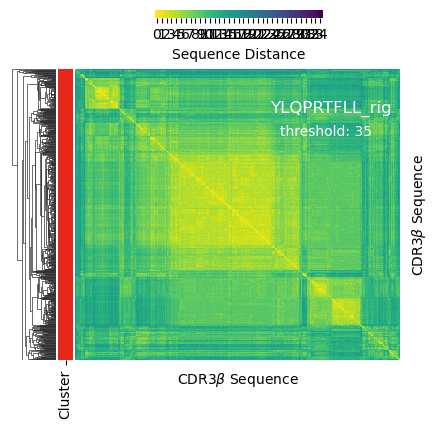

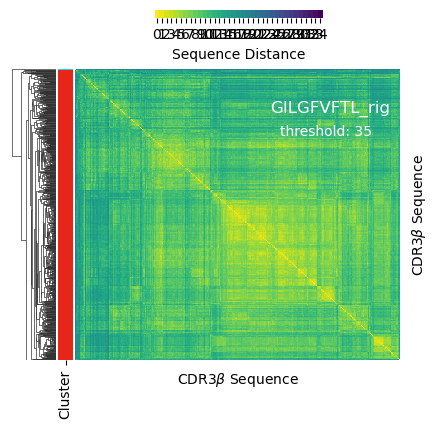

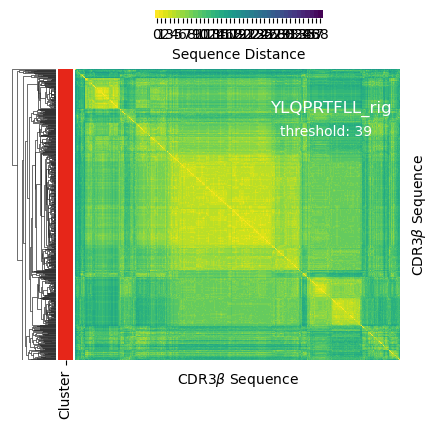

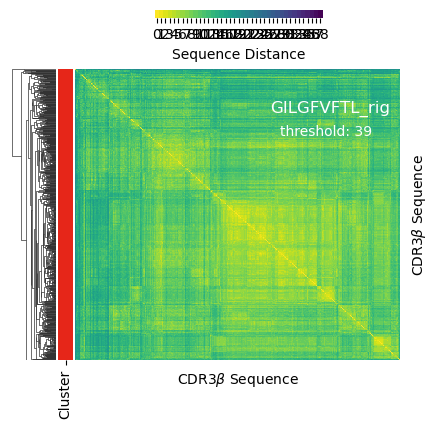

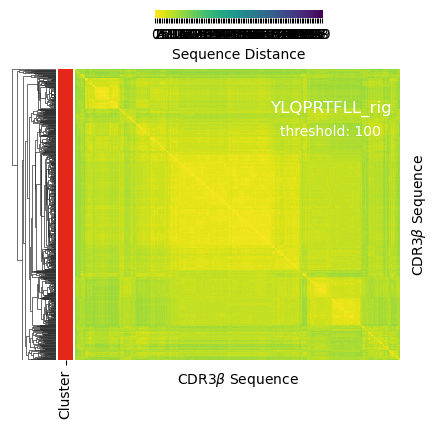

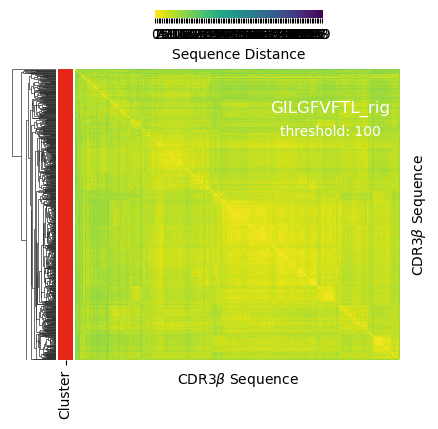

In [16]:
ralg_Dict = {}

for n, max_dist in enumerate(distance_thresholds):

    ralg_Dict[f"Threshold {max_dist}"] = {}

    for i, ep in enumerate(epitopes):
        print("Epitope:", (ep_names[i]))
        rdist, rcg, rlinkage, rcluster = similarity_clustermap(df= ep, dist_thres = max_dist,
                                                               epitope_name = (f'{ep_names[i]}_rig'), 
                                                           alpha_column='Glob ralg',beta_column='Glob ralg',
                                                           )
        print(pd.Series(rcluster).value_counts().head(10)) # show 10 largest clusters
        
        rcluster_number, rcount = np.unique(rcluster, return_counts=True) # cluster_number = cluster id, count = cluster size
        
        ralg_Dict[f"Threshold {max_dist}"][f"{ep_names[i]}"] = {} # padded clusters
        
        for j, cl in enumerate(rcluster_number[rcount>min_group_size]):
            tcrs = ep[rcluster==cl]
            ralg_Dict[f"Threshold {max_dist}"][f"{ep_names[i]}"][f"Group {j}"] = {}
            ralg_Dict[f"Threshold {max_dist}"][f"{ep_names[i]}"][f"Group {j}"] = tcrs

In [17]:
np.save('lalg_dict.npy', lalg_Dict) 
np.save('ralg_dict.npy', ralg_Dict) 

## Plotting Number of Clusters

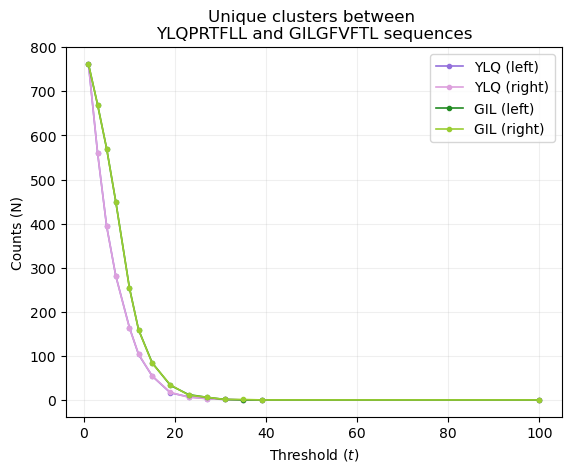

In [18]:
lcluster_no_1,rcluster_no_1,lcluster_no_2,rcluster_no_2 = ([] for i in range(4))

for t in distance_thresholds:
    l_clusters_1 = len(lalg_Dict[f'Threshold {t}']['YLQPRTFLL'])
    lcluster_no_1.append(l_clusters_1)
    
    r_clusters_1 = len(ralg_Dict[f'Threshold {t}']['YLQPRTFLL'])
    rcluster_no_1.append(r_clusters_1)
    
    l_clusters_2 = len(lalg_Dict[f'Threshold {t}']['GILGFVFTL'])
    lcluster_no_2.append(l_clusters_2)
    
    r_clusters_2 = len(ralg_Dict[f'Threshold {t}']['GILGFVFTL'])
    rcluster_no_2.append(r_clusters_2)    
    
names =['YLQ (left)', 'YLQ (right)','GIL (left)','GIL (right)']
colours = ['mediumpurple','plum', 'forestgreen','yellowgreen']

plt.figure()
plt.grid(alpha=0.2)
plt.title("Unique clusters between \nYLQPRTFLL and GILGFVFTL sequences")
plt.xlabel(r"Threshold ($t$)")
plt.ylabel("Counts (N)")

plt.plot(distance_thresholds, lcluster_no_1,'.-',label=names[0],linewidth=1.2, color = colours[0])
plt.plot(distance_thresholds, rcluster_no_1,'.-',label=names[1],linewidth=1.2, color = colours[1])
plt.plot(distance_thresholds, lcluster_no_2,'.-',label=names[2],linewidth=1.2, color = colours[2])
plt.plot(distance_thresholds, rcluster_no_2,'.-',label=names[3],linewidth=1.2, color = colours[3])

plt.legend()  
plt.savefig('Figures/Number_of_clusters.jpg')
plt.show()

## References

[1] A. Mayer, "Pyrepseq: the Swiss army knife of immune repertoire analyses", [Online at https://github.com/andim/pyrepseq/tree/main, last accessed September 2023], 2022. 